In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import datetime
import pandas as pd
import numpy as np
from functools import partial
from dateutil import parser as dtparser

from utils.datafetch import *
from utils.vectorized_funs import *
from utils.datapipe import *
from utils.kerasutil import *
from FintechCapstone import FinCapstone

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import print_function


Using TensorFlow backend.


In [18]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')
date_from = '2009-01-01'
date_to = '2017-03-01'
timespan = {
    "short_term": [1, 5]
    ,"medium_term": [40]
    ,"long_term": [90]
}

timespan_ab = {
    "short_term": []
    ,"medium_term": [30]
    ,"long_term": []
}

trial = FinCapstone(ticker_list=["ZHNE","BSFT","AERO","MATR","ITMSF","FIT","TIPT","TSRE","OLBK","QADA","ATTU","LGF","STX","TPCS","GSAT","ZNGA","GLW","HIMX","YHOO", "NWSA","JAKK","GLUU","AMZN", "AAPL", "EBAY", "GOOG", "DIS", "NFLX", "EA", "TWTR", "FB", "TTWO", "PXLW", "UBI"], ticker_list_samplesize=4, timespan=timespan, timespan_ab=timespan_ab, date_from=date_from)
#trial = FinCapstone(ticker_list_samplesize=200, timespan=timespan, timespan_ab=timespan_ab, date_from=date_from)

#trial.run_initial_dataload()
#trial.feature_engineering()

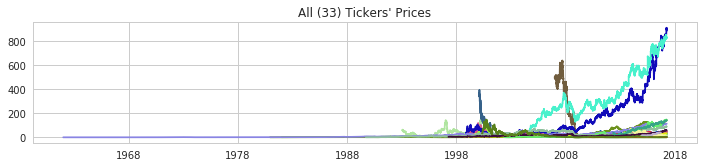

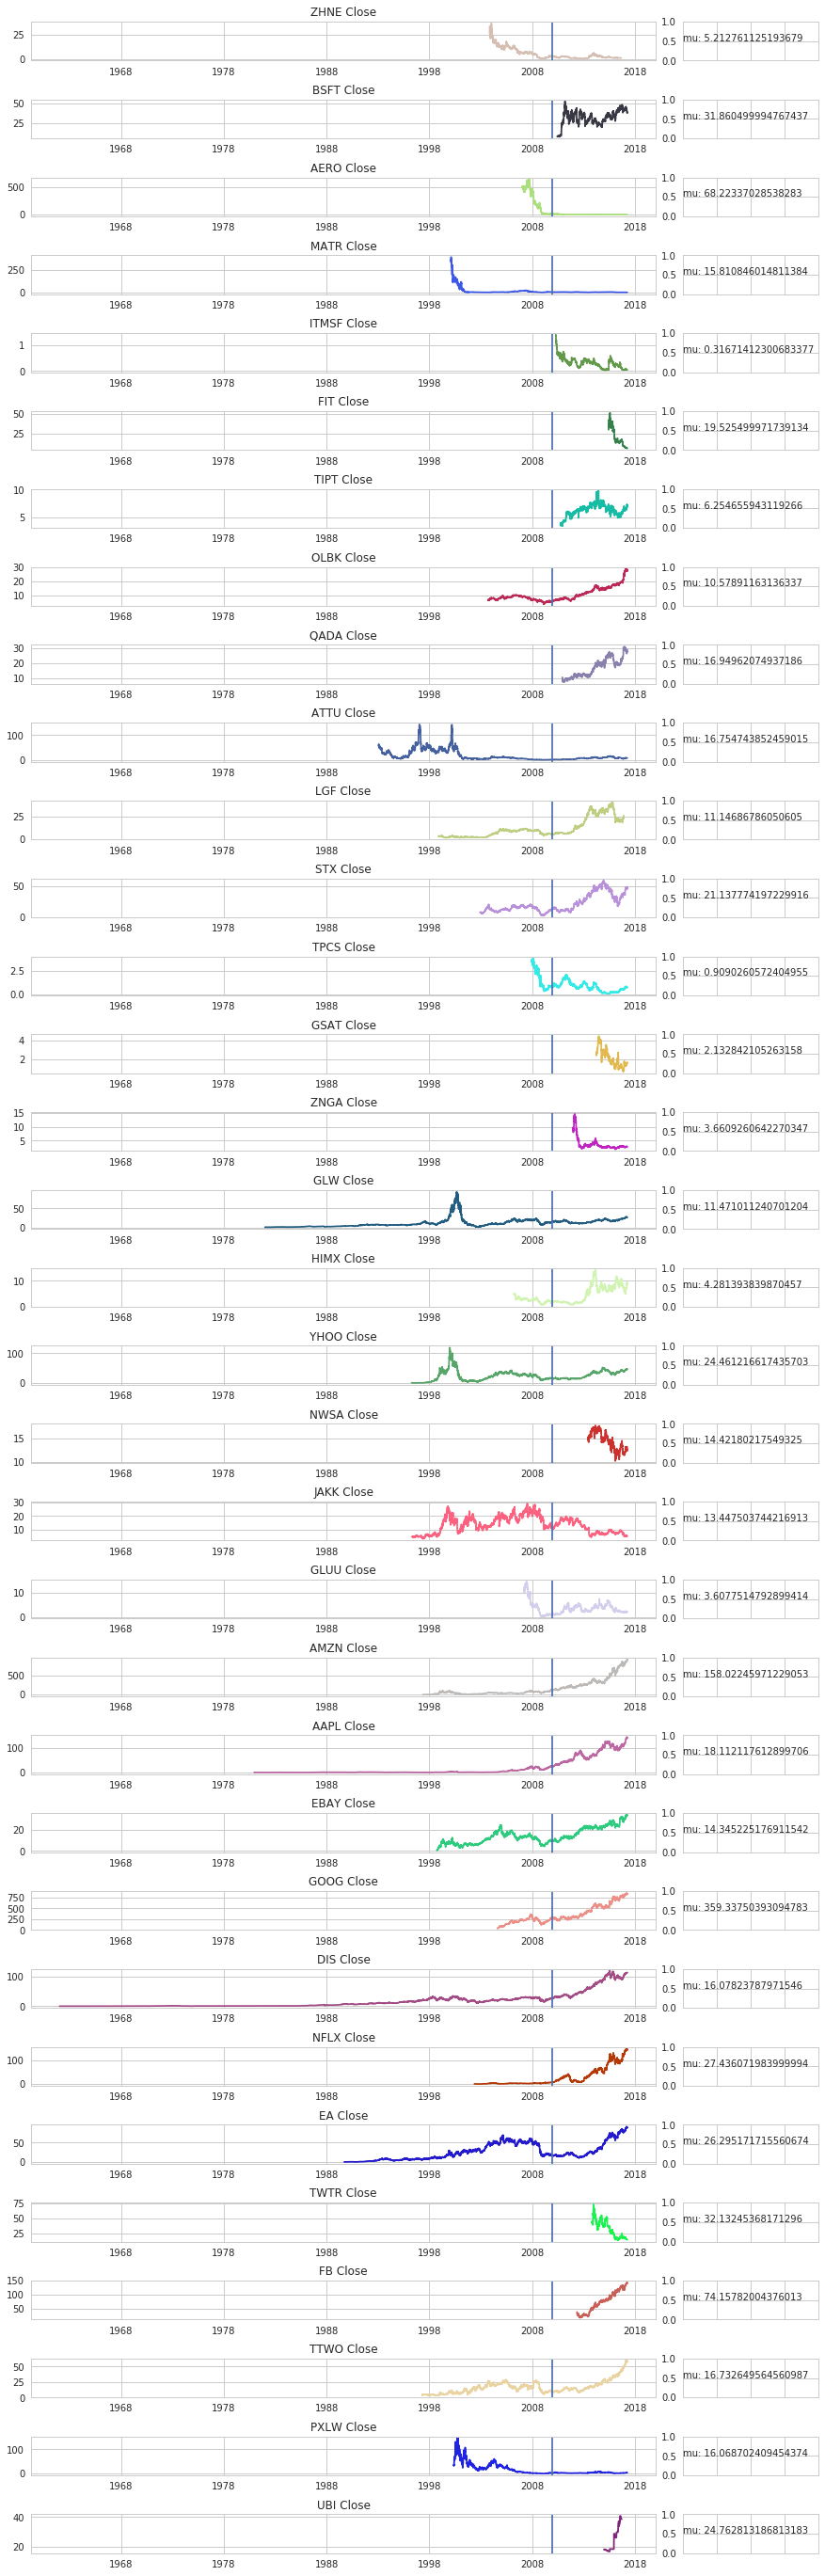

In [23]:
def plot_allprices(ticker_list):
    
    ## Setup our image
    fig = plt.figure(figsize=(15, 3))
    grid = plt.GridSpec(4, 5, hspace=0.2, wspace=0.2)
    
    
    main_ax = fig.add_subplot(grid[:-1, :4])

    main_ax.set_title("All ({}) Tickers' Prices".format(ticker_list.shape[0]))
    for itr_ticker in ticker_list:
        #Load Dataframes with the raw prices
        raw_df = load_raw_frame(itr_ticker, tryfetch=True, dropAdjClose=True)
        raw_df.set_index("Date", inplace=True)
        
        x = raw_df.index.tolist()
        
        #Plot close price
        main_ax.plot(x, raw_df["Close"], '-g', label="Close", c=np.random.rand(3,1))


    plt.show()

def plot_allprices_list(ticker_list):
    
    ## Setup our image
    fig = plt.figure(figsize=(15, 1.5*ticker_list.shape[0]))
    grid = plt.GridSpec(ticker_list.shape[0], 5, hspace=1, wspace=0.2)
    ax = []
    summary = []
    
    for idx_ticker, itr_ticker in enumerate(ticker_list):
        ax.append(fig.add_subplot(grid[idx_ticker, :4], sharex=(None if idx_ticker == 0 else ax[0])))
        summary.append(fig.add_subplot(grid[idx_ticker, 4]))
    
    for idx_ticker, itr_ticker in enumerate(ticker_list):
        #Load Dataframes with the raw prices
        raw_df = load_raw_frame(itr_ticker, tryfetch=True, dropAdjClose=True)
        raw_df.set_index("Date", inplace=True)
        
        x = raw_df.index.tolist()
        
        #Plot close price
        ax[idx_ticker].plot(x, raw_df["Close"], '-g', label="Close", c=np.random.rand(3,1))
        ax[idx_ticker].set_title("{} Close".format(itr_ticker))
        
        ax[idx_ticker].axvline(x='2010-01-01')
        
        summary[idx_ticker].text(0,0.5, 'mu: {}'.format(raw_df["Close"].mean()))
        summary[idx_ticker].tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            left='off',      # ticks along the bottom edge are off
            right='off',         # ticks along the top edge are of
            labelbottom='off') # labels along the bottom edge are off        


    plt.show()

plot_allprices(trial.valid_ticker_list())
plot_allprices_list(trial.valid_ticker_list()[:])

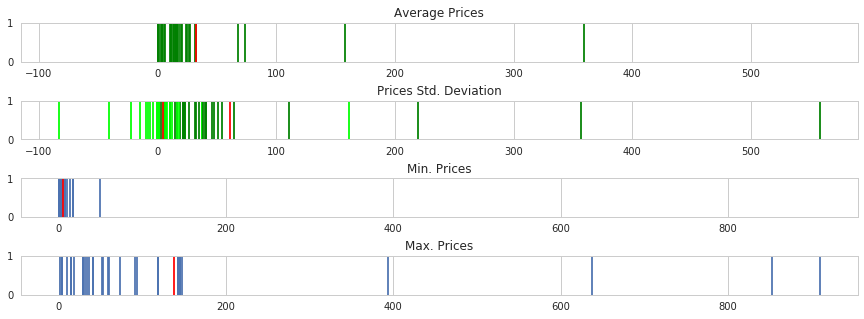

In [62]:
def plot_pricedist(ticker_list):
    _tickers = dict()
    _pnl = None
    
    ## Setup our image
    fig = plt.figure(figsize=(15, 5))
    grid = plt.GridSpec(4, 4, hspace=1, wspace=0.2)
    
    mean_ax = fig.add_subplot(grid[0, :])
    std_ax = fig.add_subplot(grid[1, :], sharex=mean_ax)
    min_ax = fig.add_subplot(grid[2, :])
    max_ax = fig.add_subplot(grid[3, :], sharex=min_ax)
    
    mean_ax.set_title("Average Prices")
    std_ax.set_title("Prices Std. Deviation")
    min_ax.set_title("Min. Prices")
    max_ax.set_title("Max. Prices")

    
    for itr_ticker in ticker_list:
        #Load Dataframes with the raw prices
        raw_df = load_raw_frame(itr_ticker, tryfetch=True, parseDate=True, dropAdjClose=True)
        raw_df.set_index("Date", inplace=True)
        
        mean_ax.axvline(x=raw_df["Close"].mean(), color="green")
        std_ax.axvline(x=raw_df["Close"].mean() + raw_df["Close"].std(), color="green")
        std_ax.axvline(x=raw_df["Close"].mean() - raw_df["Close"].std(), color="lime")
        min_ax.axvline(x=raw_df["Close"].min())
        max_ax.axvline(x=raw_df["Close"].max())
        
        _tickers[itr_ticker] = raw_df.describe()
    
    _pnl = pd.Panel(_tickers)
    
    
    mean_ax.axvline(x=_pnl[:,"mean","Close"].mean(), color="red")
    std_ax.axvline(x=_pnl[:,"mean","Close"].mean() - _pnl[:,"std","Close"].mean(), color="red")
    std_ax.axvline(x=_pnl[:,"mean","Close"].mean() + _pnl[:,"std","Close"].mean(), color="red")
    min_ax.axvline(x=_pnl[:,"min", "Close"].mean(), color="red")
    max_ax.axvline(x=_pnl[:,"max", "Close"].mean(), color="red")


    plt.show()

plot_pricedist(trial.valid_ticker_list()[:])

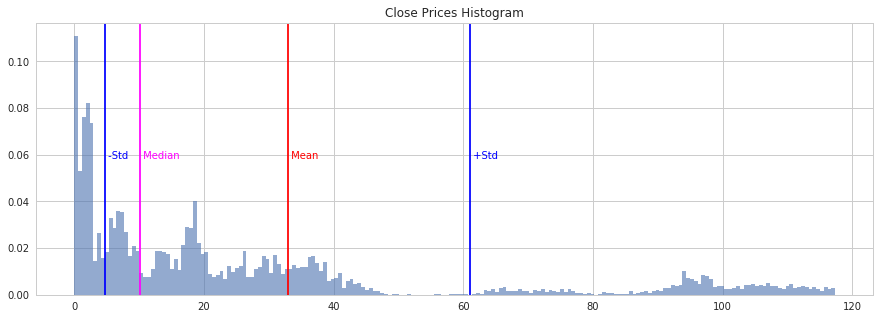

In [178]:
scale = 3
_tickers = dict()
_data = dict()


## Iterate all tickers to read stats and prices
for itr_ticker in trial.valid_ticker_list():
    raw_df = load_raw_frame(itr_ticker, parseDate=True, dropAdjClose=True)
    raw_df.set_index("Date", inplace=True)
    
    ##Store Stats
    _tickers[itr_ticker] = raw_df.describe()
    ##Store Prices and Volume
    _data[itr_ticker] = raw_df.loc[:, ["Close", "Volume"]]


##Convert into DataPanels
_stats = pd.Panel(_tickers)
_pnl = pd.Panel(_data)


mu = _stats[:,"mean","Close"].mean()
std = _stats[:,"std","Close"].mean()
mode = _stats[:,"std","Close"].mode()
median = _stats[:,"std","Close"].median()


#Create Bin range from [-std, +std] with centered mean
bins = np.linspace(max(mu - scale*std, 0), mu + scale*std, 200)

## Setup our image
fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(4, 4, hspace=1, wspace=0.2)


#Close Ploting
ax = fig.add_subplot(grid[0:, :])

kwargs = dict(histtype='stepfilled', alpha=0.6, normed=True, bins=bins)

ax.set_title("{} Prices Histogram".format("Close"))
ax.hist(_pnl[:,:,"Close"].dropna().values.flatten(), **kwargs)

#Mark descriptive stats
ax.axvline(mu, color="red")
ax.axvline(mu-std, color="blue")
ax.axvline(mu+std, color="blue")
ax.axvline(median, color="magenta")

#Annotate descriptive stats
ax.text(mu,     (0.5 * ax.get_ylim()[1]), " Mean", color="red")
ax.text(mu-std, (0.5 * ax.get_ylim()[1]), " -Std", color="blue")
ax.text(mu+std, (0.5 * ax.get_ylim()[1]), " +Std", color="blue")
ax.text(median, (0.5 * ax.get_ylim()[1]), " Median", color="magenta")

plt.show()

